In [1]:
import random
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


from extract_data import get_dataset

In [2]:
dataset = get_dataset()
x_data, y_data = dataset

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
Either api or coformer not found. API= 1,2,4-thiadiazole derivative . Coformer= Vanillic acid
Either api or coformer not found. API= 4-cyanophenol . Coformer= 1,2-bis(4-dipyridyl)ethane
Either api or coformer not found. API= 4-cyanophenol . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= bicalutamide . Coformer= trans-1,2-bis(4-dipyridyl)ethylene
Either api or coformer not found. API= Flurbiprofen . Coformer= 4,4'-ethylenebipyridine
Either api or coformer not found. API= Ibuprofen . Coformer= 4,4'-ethylenbipyridine
Either api or coformer not found. API= 3-cyanopyridin

In [3]:
n_components = 200
n_estimators = 50
max_depth = None
min_samples_leaf = 1

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_data.iloc[:,:-2])

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

x_data_values = principal_components

y_data_values = y_data.iloc[:,:1]

random.seed(40)
shuffled_indices = random.sample(range(x_data_values.shape[0]),x_data_values.shape[0])
test_size = 0.2
train_cursor = int(np.floor((1-test_size)*(x_data_values.shape[0])))
train_indices = shuffled_indices[:train_cursor]
test_indices = shuffled_indices[train_cursor:]

x_train = pd.DataFrame(x_data_values[train_indices,:])
y_train = y_data_values.iloc[train_indices,:]

x_test = pd.DataFrame(x_data_values[test_indices,:])
y_test = y_data_values.iloc[test_indices,:]

In [43]:
rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
rf_model.fit(x_train, y_train)

/opt/anaconda3/envs/cocrystal/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=50)

In [44]:
y_pred_train = rf_model.predict(x_train)
y_pred_test = rf_model.predict(x_test)

In [45]:
accuracy_score(y_test, y_pred_test)

0.9475806451612904

In [46]:
accuracy_score(y_train, y_pred_train)

0.9959595959595959

In [47]:
with open('models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [50]:
rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

# rf_model.fit(x_train, y_train) # To train the model
# with open('models/rf_model.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

with open('models/rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

y_pred = rf_model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9475806451612904

In [48]:
accuracy_score(y_train, rf_model.predict(x_train))

0.9959595959595959

In [51]:
r = 10

print("Accuracy:", round(accuracy_score(y_test, y_pred),r))
print("Precision:", round(precision_score(y_test, y_pred),r))
print("Recall:", round(recall_score(y_test, y_pred),r))
print("F1-Score:", round(f1_score(y_test, y_pred),r))
print(classification_report(y_test, y_pred))

Accuracy: 0.9475806452
Precision: 0.9356060606
Recall: 0.96484375
F1-Score: 0.95
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       240
           1       0.94      0.96      0.95       256

    accuracy                           0.95       496
   macro avg       0.95      0.95      0.95       496
weighted avg       0.95      0.95      0.95       496



Confusion Matrix:
[[223  17]
 [  9 247]]


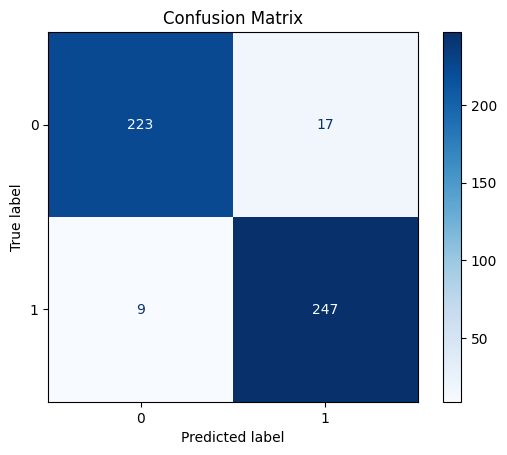

In [52]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()